# Plotting time-series in R using pluto

A getting started guide

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)

options("scipen"=999)
options(stringsAsFactors = FALSE)
source("config.R")

indices<-Indices()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


Let's pick a long time-series. This will allow us to play with different aspects of plotting...

In [2]:
cutOff <- Sys.Date() - 10
trIndices <- indices$NseTimeSeries() %>%
    group_by(NAME) %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    filter(ST <= '2005-01-01' && ET >= cutOff && NAME %like% '% TR') %>%
    arrange(ST)

trIndices %>% print(n=Inf)

Warning message:
“Missing values are always removed in SQL.
Use `MIN(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”Warning message:
“Missing values are always removed in SQL.
Use `MAX(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

# Source:     lazy query [?? x 3]
# Database:   Microsoft SQL Server 13.00.4224[ro1@NORWAY/StockViz]
# Ordered by: ST
   NAME                        ST         ET        
   <chr>                       <date>     <date>    
 1 NIFTY50 EQUAL WEIGHT TR     1995-11-03 2019-06-25
 2 NIFTY 500 TR                1998-11-26 2019-06-25
 3 NIFTY FMCG TR               1998-11-26 2019-06-25
 4 NIFTY MNC TR                1998-11-26 2019-06-25
 5 NIFTY SERVICES SECTOR TR    1999-06-01 2019-06-25
 6 NIFTY 50 TR                 1999-06-30 2019-06-25
 7 NIFTY IT TR                 1999-06-30 2019-06-25
 8 NIFTY BANK TR               2000-01-01 2019-06-25
 9 NIFTY PSE TR                2000-01-03 2019-06-25
10 NIFTY ENERGY TR             2001-01-01 2019-06-25
11 NIFTY PHARMA TR             2001-01-01 2019-06-25
12 NIFTY NEXT 50 TR            2002-11-08 2019-06-25
13 NIFTY MIDCAP 100 TR         2003-01-01 2019-06-25
14 NIFTY 100 TR                2003-01-01 2019-06-25
15 NIFTY100 EQUAL WEIGHT TR    200

NIFTY 500 TR makes a good candidate. It is a broad based index the represents the top-500 stocks by free-float market cap listed on the NSE...

In [3]:
indexName <- "NIFTY 500 TR"
trDf <- data.frame(indices$NseTimeSeries() %>%
    filter(NAME == indexName) %>%
    select(TIME_STAMP, HIGH, LOW, OPEN, CLOSE))
trXts<-xts(trDf[,-1], trDf[,1])

print(head(trXts))
print(tail(trXts))

           HIGH LOW OPEN  CLOSE
1998-11-26   NA  NA   NA 611.43
1998-11-27   NA  NA   NA 603.22
1998-11-28   NA  NA   NA 602.15
1998-11-30   NA  NA   NA 607.47
1998-12-01   NA  NA   NA 606.23
1998-12-02   NA  NA   NA 609.96
           HIGH LOW OPEN    CLOSE
2019-06-18   NA  NA   NA 14229.85
2019-06-19   NA  NA   NA 14192.79
2019-06-20   NA  NA   NA 14380.25
2019-06-21   NA  NA   NA 14284.21
2019-06-24   NA  NA   NA 14258.15
2019-06-25   NA  NA   NA 14360.63


Note: the series only has closing prices. 

In [4]:
#setup the data for ggplot
firstDate <- first(index(trXts))
lastDate <- last(index(trXts))
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

toPlotDf <- data.frame(trXts[, 'CLOSE'])
names(toPlotDf) <- c('C')
toPlotDf$T <- index(trXts)

options(repr.plot.width=16, repr.plot.height=8)

### plot the series as-is

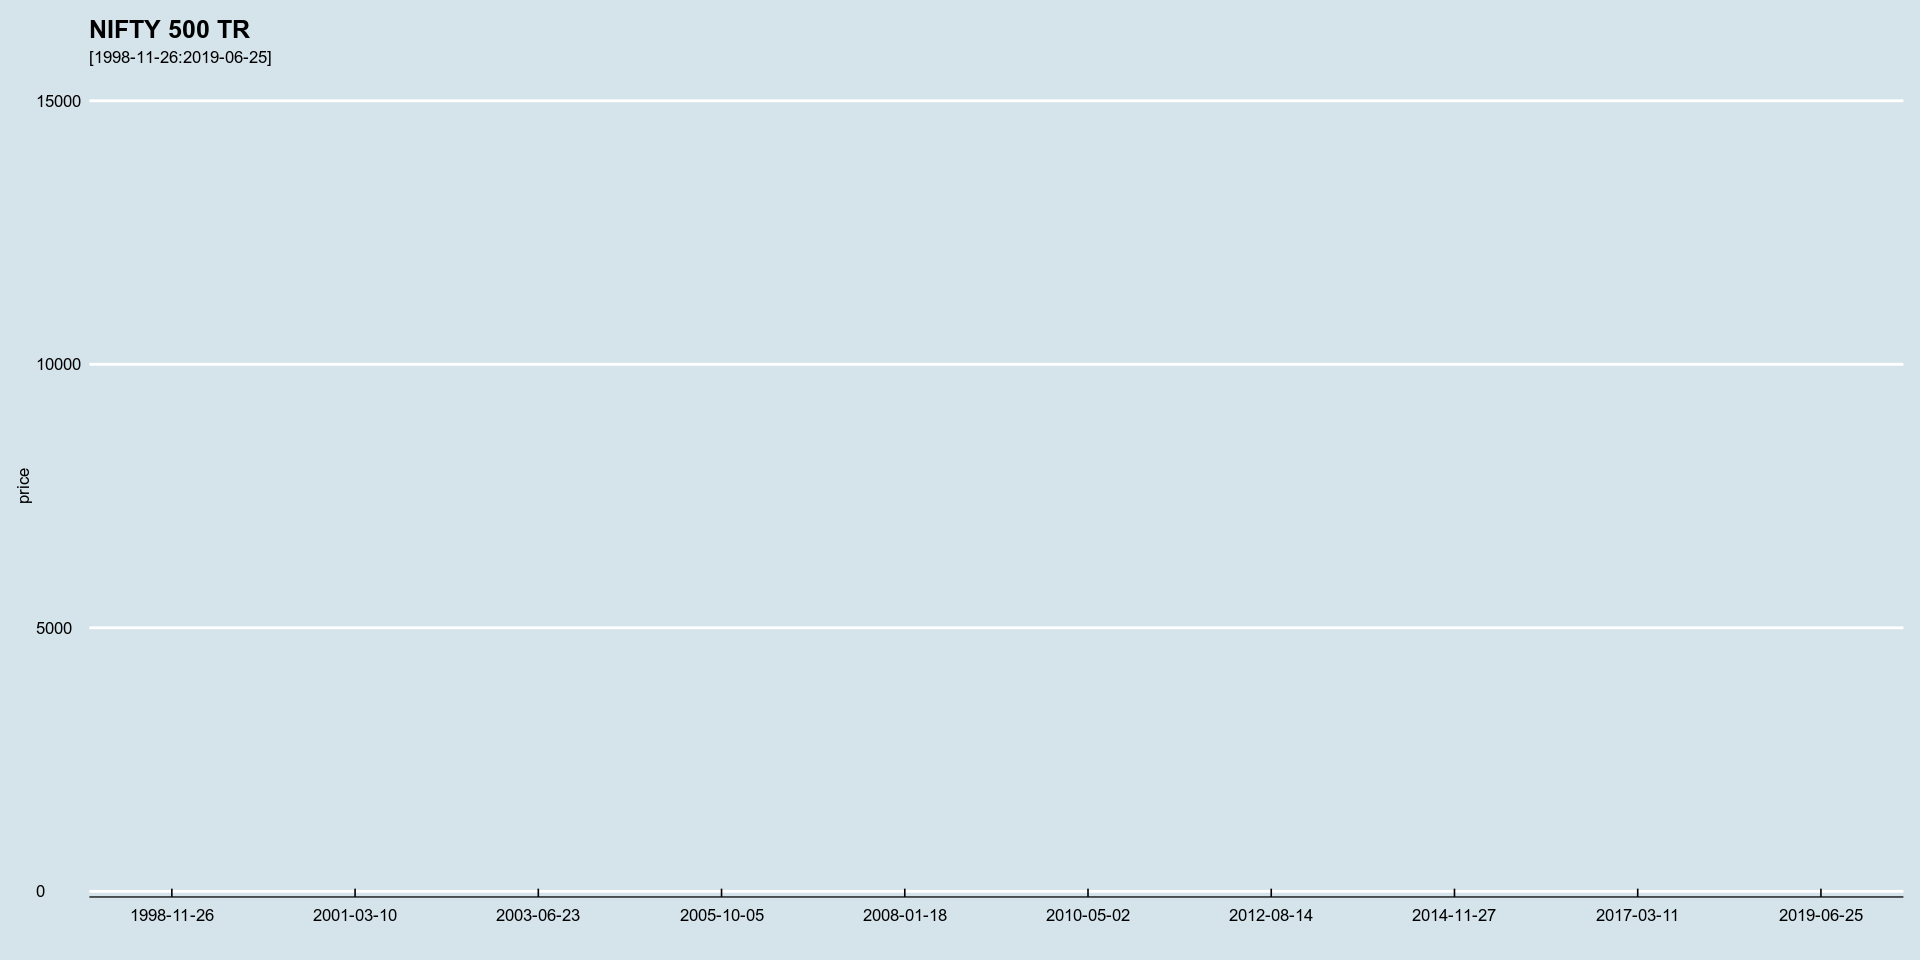

In [5]:
ggplot(toPlotDf, aes(x=T, y=C)) +
    theme_economist() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='price', color='', title=sprintf("%s", indexName), subtitle=sprintf("[%s:%s]", firstDate, lastDate)) 
    #annotate("text", x=lastDate, y=min(toPlotDf$C, na.rm=T), label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)